In [1]:
import sympy as sp

In [2]:
import sympy.physics.units.quantities as sq

In [3]:
from sympy.physics.quantum.constants import hbar

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
from copy import deepcopy

In [7]:
from custom_libraries.stepper import *

In [8]:
from custom_libraries.schrodinger import *

In [9]:
from custom_libraries.utilities import *

In [10]:
def real_harmonics( _ ):
    assumptions = standard_harmonic_assumptions( _ );
    assumptions.update( { 'real' : True } )
    return assumptions

In [11]:
stairwell_solver = TimeIndependentSchrodingerConstantPotentials1D( 
        StairWell.default_non_uniform_length_potential_table(), 
        tuple( StairWell.default_non_uniform_length_potential_table().keys() )[ -1 ], 
        make_psis = make_psi_numbered, 
        harmonics_assumptions = real_harmonics, 
        repeating = False, 
        as_distances = True, 
        #as_distances = False, 
        #normalization_conjugate_not_squared_absolute_value = False
    )

In [12]:
stairwell_solver.impose_zero_conditions_to_ends()

(('BoundryZeroConditions', {\psi_{0}(0): 0, \psi_{2}(L_2): 0}),
 ('BoundryZeroConditions', {\psi_{0}(0): 0, \psi_{2}(L_2): 0}))

In [13]:
display_steps( stairwell_solver.equations )

Eq(-k_0**2*\psi_{0}(x) + Derivative(\psi_{0}(x), (x, 2)), 0)

Eq(-k_1**2*\psi_{1}(x) + Derivative(\psi_{1}(x), (x, 2)), 0)

Eq(-k_2**2*\psi_{2}(x) + Derivative(\psi_{2}(x), (x, 2)), 0)

In [14]:
display_in( stairwell_solver.harmonic_constants )

Eq(k_0, sqrt(2)*sqrt(m)*sqrt(-E + V_0)/hbar)

Eq(k_1, sqrt(2)*sqrt(m)*sqrt(-E + V_1)/hbar)

Eq(k_2, sqrt(2)*sqrt(m)*sqrt(-E + V_2)/hbar)

In [15]:
stairwell_solver.boundries.boundries

{'ContinuityConditions': {\psi_{0}(L_0): \psi_{1}(0),
  \psi_{1}(L_1): \psi_{2}(0)},
 'BoundryZeroConditions': {\psi_{0}(0): 0, \psi_{2}(L_2): 0}}

In [16]:
stairwell_solver.boundries.ContinuityConditions

{\psi_{0}(L_0): \psi_{1}(0), \psi_{1}(L_1): \psi_{2}(0)}

In [17]:
stairwell_solver.boundries.BoundryZeroConditions

{\psi_{0}(0): 0, \psi_{2}(L_2): 0}

In [18]:
stairwell_solver.boundries.update_all_boundry_conditions()

('LastUpdatedAllBoundryConditions',
 {\psi_{0}(L_0): \psi_{1}(0),
  \psi_{1}(L_1): \psi_{2}(0),
  \psi_{0}(0): 0,
  \psi_{2}(L_2): 0})

In [19]:
stairwell_solver.boundries.display()

'ContinuityConditions'

Eq(\psi_{0}(L_0), \psi_{1}(0))

Eq(\psi_{1}(L_1), \psi_{2}(0))

'BoundryZeroConditions'

Eq(\psi_{0}(0), 0)

Eq(\psi_{2}(L_2), 0)

'LastUpdatedAllBoundryConditions'

Eq(\psi_{0}(L_0), \psi_{1}(0))

Eq(\psi_{1}(L_1), \psi_{2}(0))

Eq(\psi_{0}(0), 0)

Eq(\psi_{2}(L_2), 0)

In [20]:
stairwell_solver

In [21]:
solutions = stairwell_solver.solve_odes()

In [22]:
display_in( solutions )

Eq(\psi_{0}(x), \psi_{1}(0)*exp(L_0*k_0)*exp(k_0*x)/(exp(2*L_0*k_0) - 1) - \psi_{1}(0)*exp(L_0*k_0)*exp(-k_0*x)/(exp(2*L_0*k_0) - 1))

Eq(\psi_{1}(x), (\psi_{0}(L_0)*exp(2*L_1*k_1) - \psi_{2}(0)*exp(L_1*k_1))*exp(-k_1*x)/(exp(2*L_1*k_1) - 1) + (-\psi_{0}(L_0) + \psi_{2}(0)*exp(L_1*k_1))*exp(k_1*x)/(exp(2*L_1*k_1) - 1))

Eq(\psi_{2}(x), \psi_{1}(L_1)*exp(2*L_2*k_2)*exp(-k_2*x)/(exp(2*L_2*k_2) - 1) - \psi_{1}(L_1)*exp(k_2*x)/(exp(2*L_2*k_2) - 1))

In [23]:
stairwell_solver.substitute_wave_functions_into_normalizations()

In [24]:
stairwell_solver.boundries_in_expression_to_constants()

([<custom_libraries.stepper.Stepper at 0x7fb6eda1a4c0>,
 {'Before': [['TimeIndependentSchrodingerConstantPotentials1DCheckPointBeforeBoundryToConstantSubstitution105',
    'TimeIndependentSchrodingerConstantPotentials1DCheckPointBeforeBoundryToConstantSubstitution105',
    'TimeIndependentSchrodingerConstantPotentials1DCheckPointBeforeBoundryToConstantSubstitution105'],
   ['TimeIndependentSchrodingerConstantPotentials1DCheckPointBeforeBoundryToConstantSubstitution105',
    'TimeIndependentSchrodingerConstantPotentials1DCheckPointBeforeBoundryToConstantSubstitution105',
    'TimeIndependentSchrodingerConstantPotentials1DCheckPointBeforeBoundryToConstantSubstitution105']],
  'Post': [['TimeIndependentSchrodingerConstantPotentials1DCheckPointPostBoundryToConstantSubstitution112',
    'TimeIndependentSchrodingerConstantPotentials1DCheckPointPostBoundryToConstantSubstitution112',
    'TimeIndependentSchrodingerConstantPotentials1DCheckPointPostBoundryToConstantSubstitution112'],
   ['TimeI

In [25]:
display_steps( stairwell_solver.equations )

Eq(\psi_{0}(x), B_{0}*exp(L_0*k_0)*exp(k_0*x)/(exp(2*L_0*k_0) - 1) - B_{0}*exp(L_0*k_0)*exp(-k_0*x)/(exp(2*L_0*k_0) - 1))

Eq(\psi_{1}(x), (-B_{0} + B_{1}*exp(L_1*k_1))*exp(k_1*x)/(exp(2*L_1*k_1) - 1) + (B_{0}*exp(2*L_1*k_1) - B_{1}*exp(L_1*k_1))*exp(-k_1*x)/(exp(2*L_1*k_1) - 1))

Eq(\psi_{2}(x), B_{1}*exp(2*L_2*k_2)*exp(-k_2*x)/(exp(2*L_2*k_2) - 1) - B_{1}*exp(k_2*x)/(exp(2*L_2*k_2) - 1))

In [26]:
display_steps( stairwell_solver.normalizations )

Eq(Integral((B_{0}*exp(L_0*k_0)*exp(k_0*x)/(exp(2*L_0*k_0) - 1) - B_{0}*exp(L_0*k_0)*exp(-k_0*x)/(exp(2*L_0*k_0) - 1))*(exp(L_0*k_0)*exp(k_0*x)*conjugate(B_{0})/(exp(2*L_0*k_0) - 1) - exp(L_0*k_0)*exp(-k_0*x)*conjugate(B_{0})/(exp(2*L_0*k_0) - 1)), (x, 0, L_0)), N_0)

Eq(Integral(((-B_{0} + B_{1}*exp(L_1*k_1))*exp(k_1*x)/(exp(2*L_1*k_1) - 1) + (B_{0}*exp(2*L_1*k_1) - B_{1}*exp(L_1*k_1))*exp(-k_1*x)/(exp(2*L_1*k_1) - 1))*((exp(L_1*k_1)*conjugate(B_{1}) - conjugate(B_{0}))*exp(k_1*x)/(exp(2*L_1*k_1) - 1) + (exp(2*L_1*k_1)*conjugate(B_{0}) - exp(L_1*k_1)*conjugate(B_{1}))*exp(-k_1*x)/(exp(2*L_1*k_1) - 1)), (x, 0, L_1)), N_1)

Eq(Integral((B_{1}*exp(2*L_2*k_2)*exp(-k_2*x)/(exp(2*L_2*k_2) - 1) - B_{1}*exp(k_2*x)/(exp(2*L_2*k_2) - 1))*(exp(2*L_2*k_2)*exp(-k_2*x)*conjugate(B_{1})/(exp(2*L_2*k_2) - 1) - exp(k_2*x)*conjugate(B_{1})/(exp(2*L_2*k_2) - 1)), (x, 0, L_2)), N_2)

In [27]:
q_constants = []
for normalization in stairwell_solver.normalizations: 
    result, constants = group_constants( normalization.last_step(), [ stairwell_solver.position ] + stairwell_solver.boundry_constant_symbols, 'Q' )
    q_constants.append( constants )
    normalization.add_step( result )

In [28]:
display_steps( stairwell_solver.normalizations )

Eq(Integral((B_{0}*Q_{3}*exp(Q_{2}*x) - B_{0}*Q_{3}*exp(-Q_{2}*x))*(Q_{3}*exp(Q_{2}*x)*conjugate(B_{0}) - Q_{3}*exp(-Q_{2}*x)*conjugate(B_{0})), (x, 0, L_0)), N_0)

Eq(Integral((Q_{4}*(-B_{0} + B_{1}*Q_{2})*exp(Q_{3}*x) + Q_{4}*(B_{0}*Q_{6} - B_{1}*Q_{2})*exp(-Q_{3}*x))*(Q_{4}*(-Q_{2}*conjugate(B_{1}) + Q_{6}*conjugate(B_{0}))*exp(-Q_{3}*x) + Q_{4}*(Q_{2}*conjugate(B_{1}) - conjugate(B_{0}))*exp(Q_{3}*x)), (x, 0, L_1)), N_1)

Eq(Integral((-B_{1}*Q_{2}*exp(Q_{1}*x) + B_{1}*Q_{4}*exp(-Q_{1}*x))*(-Q_{2}*exp(Q_{1}*x)*conjugate(B_{1}) + Q_{4}*exp(-Q_{1}*x)*conjugate(B_{1})), (x, 0, L_2)), N_2)

In [29]:
display_table = lambda table : [ ( display( key ), display_steps( table[ key ] ) ) for key in table ]

In [30]:
auto_solved = {}
auto_solved[ 0 ] = stairwell_solver.solve_boundry_constants_from_equation( stairwell_solver.normalizations[ 0 ] )

Has  B_{0}
Solutions:  [Piecewise((-sqrt(2)*sqrt(-N_0*Q_{2}/(Q_{3}**2*(4*L_0*Q_{2}*exp(2*L_0*Q_{2}) - exp(4*L_0*Q_{2}) + 1)))*exp(L_0*Q_{2}), Ne(Q_{2}, 0)), (nan, True)), Piecewise((sqrt(2)*sqrt(-N_0*Q_{2}/(Q_{3}**2*(4*L_0*Q_{2}*exp(2*L_0*Q_{2}) - exp(4*L_0*Q_{2}) + 1)))*exp(L_0*Q_{2}), Ne(Q_{2}, 0)), (nan, True))]


B_{0}

I have sols!


Piecewise((-sqrt(2)*sqrt(-N_0*Q_{2}/(Q_{3}**2*(4*L_0*Q_{2}*exp(2*L_0*Q_{2}) - exp(4*L_0*Q_{2}) + 1)))*exp(L_0*Q_{2}), Ne(Q_{2}, 0)), (nan, True))

Piecewise((sqrt(2)*sqrt(-N_0*Q_{2}/(Q_{3}**2*(4*L_0*Q_{2}*exp(2*L_0*Q_{2}) - exp(4*L_0*Q_{2}) + 1)))*exp(L_0*Q_{2}), Ne(Q_{2}, 0)), (nan, True))

Solved for  B_{0}


In [31]:
display_table( auto_solved[ 0 ] )

B_{0}

Piecewise((-sqrt(2)*sqrt(-N_0*Q_{2}/(Q_{3}**2*(4*L_0*Q_{2}*exp(2*L_0*Q_{2}) - exp(4*L_0*Q_{2}) + 1)))*exp(L_0*Q_{2}), Ne(Q_{2}, 0)), (nan, True))

Piecewise((sqrt(2)*sqrt(-N_0*Q_{2}/(Q_{3}**2*(4*L_0*Q_{2}*exp(2*L_0*Q_{2}) - exp(4*L_0*Q_{2}) + 1)))*exp(L_0*Q_{2}), Ne(Q_{2}, 0)), (nan, True))

[(None, None)]

In [32]:
auto_solved[ 1 ] = stairwell_solver.solve_boundry_constants_from_equation( stairwell_solver.normalizations[ 1 ] )

Has  B_{0}
Solutions:  [Piecewise(((B_{1}*Q_{2}*Q_{4}*(2*L_1*Q_{3}*Q_{6}*exp(2*L_1*Q_{3}) + 2*L_1*Q_{3}*exp(2*L_1*Q_{3}) - Q_{6}*exp(2*L_1*Q_{3}) + Q_{6} - exp(4*L_1*Q_{3}) + exp(2*L_1*Q_{3})) + sqrt(4*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*Q_{6}**2*exp(2*L_1*Q_{3}) - 8*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*Q_{6}*exp(2*L_1*Q_{3}) + 4*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2*exp(4*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2 + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}*exp(4*L_1*Q_{3}) - 4*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}*exp(2*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6} - B_{1}**2*Q_{2}**2*Q_{4}**2*exp(4*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2 - 8*L_1*N_1*Q_{3}**2*Q_{6}*exp(2*L_1*Q_{3}) + 2*N_1*Q_{3}*Q_{6}**2*exp(2*L_1*Q_{3}) - 2*N_1*Q_{3}*Q_{6}**2 + 2*N_1*Q_{3}*exp(4*L_1*Q_{3}) - 2*N_1*Q_{3}*exp(2*L_1*Q_{3}))*exp(L_1

B_{0}

I have sols!


Piecewise(((B_{1}*Q_{2}*Q_{4}*(2*L_1*Q_{3}*Q_{6}*exp(2*L_1*Q_{3}) + 2*L_1*Q_{3}*exp(2*L_1*Q_{3}) - Q_{6}*exp(2*L_1*Q_{3}) + Q_{6} - exp(4*L_1*Q_{3}) + exp(2*L_1*Q_{3})) + sqrt(4*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*Q_{6}**2*exp(2*L_1*Q_{3}) - 8*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*Q_{6}*exp(2*L_1*Q_{3}) + 4*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2*exp(4*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2 + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}*exp(4*L_1*Q_{3}) - 4*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}*exp(2*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6} - B_{1}**2*Q_{2}**2*Q_{4}**2*exp(4*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2 - 8*L_1*N_1*Q_{3}**2*Q_{6}*exp(2*L_1*Q_{3}) + 2*N_1*Q_{3}*Q_{6}**2*exp(2*L_1*Q_{3}) - 2*N_1*Q_{3}*Q_{6}**2 + 2*N_1*Q_{3}*exp(4*L_1*Q_{3}) - 2*N_1*Q_{3}*exp(2*L_1*Q_{3}))*exp(L_1*Q_{3}))/(Q_{4}*(4*L_1*Q

Piecewise(((2*B_{1}*L_1*Q_{2}*Q_{3}*Q_{4}*Q_{6}*exp(2*L_1*Q_{3}) + 2*B_{1}*L_1*Q_{2}*Q_{3}*Q_{4}*exp(2*L_1*Q_{3}) - B_{1}*Q_{2}*Q_{4}*Q_{6}*exp(2*L_1*Q_{3}) + B_{1}*Q_{2}*Q_{4}*Q_{6} - B_{1}*Q_{2}*Q_{4}*exp(4*L_1*Q_{3}) + B_{1}*Q_{2}*Q_{4}*exp(2*L_1*Q_{3}) - sqrt(4*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*Q_{6}**2*exp(2*L_1*Q_{3}) - 8*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*Q_{6}*exp(2*L_1*Q_{3}) + 4*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2*exp(4*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2 + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}*exp(4*L_1*Q_{3}) - 4*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}*exp(2*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6} - B_{1}**2*Q_{2}**2*Q_{4}**2*exp(4*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2 - 8*L_1*N_1*Q_{3}**2*Q_{6}*exp(2*L_1*Q_{3}) + 2*N_1*Q_{3}*Q_{6}**2*exp(2*L_1*Q_{3}) - 2*N_1*Q_{3}*Q_{6}**2 + 2*N_

Piecewise((-sqrt(N_1/(L_1*Q_{4}**2*(Q_{6}**2 - 2*Q_{6} + 1))), Eq(Q_{3}, 0)), (nan, True))

Piecewise((sqrt(N_1/(L_1*Q_{4}**2*(Q_{6}**2 - 2*Q_{6} + 1))), Eq(Q_{3}, 0)), (nan, True))

Solved for  B_{0}


In [33]:
display_table( auto_solved[ 1 ] )

B_{0}

Piecewise((-sqrt(2)*sqrt(-N_0*Q_{2}/(Q_{3}**2*(4*L_0*Q_{2}*exp(2*L_0*Q_{2}) - exp(4*L_0*Q_{2}) + 1)))*exp(L_0*Q_{2}), Ne(Q_{2}, 0)), (nan, True))

Piecewise((sqrt(2)*sqrt(-N_0*Q_{2}/(Q_{3}**2*(4*L_0*Q_{2}*exp(2*L_0*Q_{2}) - exp(4*L_0*Q_{2}) + 1)))*exp(L_0*Q_{2}), Ne(Q_{2}, 0)), (nan, True))

Piecewise(((B_{1}*Q_{2}*Q_{4}*(2*L_1*Q_{3}*Q_{6}*exp(2*L_1*Q_{3}) + 2*L_1*Q_{3}*exp(2*L_1*Q_{3}) - Q_{6}*exp(2*L_1*Q_{3}) + Q_{6} - exp(4*L_1*Q_{3}) + exp(2*L_1*Q_{3})) + sqrt(4*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*Q_{6}**2*exp(2*L_1*Q_{3}) - 8*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*Q_{6}*exp(2*L_1*Q_{3}) + 4*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2*exp(4*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2 + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}*exp(4*L_1*Q_{3}) - 4*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}*exp(2*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6} - B_{1}**2*Q_{2}**2*Q_{4}**2*exp(4*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2 - 8*L_1*N_1*Q_{3}**2*Q_{6}*exp(2*L_1*Q_{3}) + 2*N_1*Q_{3}*Q_{6}**2*exp(2*L_1*Q_{3}) - 2*N_1*Q_{3}*Q_{6}**2 + 2*N_1*Q_{3}*exp(4*L_1*Q_{3}) - 2*N_1*Q_{3}*exp(2*L_1*Q_{3}))*exp(L_1*Q_{3}))/(Q_{4}*(4*L_1*Q

Piecewise(((2*B_{1}*L_1*Q_{2}*Q_{3}*Q_{4}*Q_{6}*exp(2*L_1*Q_{3}) + 2*B_{1}*L_1*Q_{2}*Q_{3}*Q_{4}*exp(2*L_1*Q_{3}) - B_{1}*Q_{2}*Q_{4}*Q_{6}*exp(2*L_1*Q_{3}) + B_{1}*Q_{2}*Q_{4}*Q_{6} - B_{1}*Q_{2}*Q_{4}*exp(4*L_1*Q_{3}) + B_{1}*Q_{2}*Q_{4}*exp(2*L_1*Q_{3}) - sqrt(4*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*Q_{6}**2*exp(2*L_1*Q_{3}) - 8*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*Q_{6}*exp(2*L_1*Q_{3}) + 4*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2*exp(4*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2 + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}*exp(4*L_1*Q_{3}) - 4*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}*exp(2*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6} - B_{1}**2*Q_{2}**2*Q_{4}**2*exp(4*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2 - 8*L_1*N_1*Q_{3}**2*Q_{6}*exp(2*L_1*Q_{3}) + 2*N_1*Q_{3}*Q_{6}**2*exp(2*L_1*Q_{3}) - 2*N_1*Q_{3}*Q_{6}**2 + 2*N_

Piecewise((-sqrt(N_1/(L_1*Q_{4}**2*(Q_{6}**2 - 2*Q_{6} + 1))), Eq(Q_{3}, 0)), (nan, True))

Piecewise((sqrt(N_1/(L_1*Q_{4}**2*(Q_{6}**2 - 2*Q_{6} + 1))), Eq(Q_{3}, 0)), (nan, True))

[(None, None)]

In [34]:
def clean_nan_piecewise( nan_piecewise ): 
    if type( nan_piecewise.args[ 1 ][ 0 ] ) is sp.core.numbers.NaN: 
        return nan_piecewise.args[ 0 ][ 0 ]

In [35]:
sol_1_positive = clean_nan_piecewise( list( auto_solved[ 1 ].values() )[ 0 ][ 2 ].last_step() )

In [36]:
sol_1_negative = clean_nan_piecewise( list( auto_solved[ 1 ].values() )[ 0 ][ 3 ].last_step() )

In [37]:
sol_1_positive

(B_{1}*Q_{2}*Q_{4}*(2*L_1*Q_{3}*Q_{6}*exp(2*L_1*Q_{3}) + 2*L_1*Q_{3}*exp(2*L_1*Q_{3}) - Q_{6}*exp(2*L_1*Q_{3}) + Q_{6} - exp(4*L_1*Q_{3}) + exp(2*L_1*Q_{3})) + sqrt(4*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*Q_{6}**2*exp(2*L_1*Q_{3}) - 8*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*Q_{6}*exp(2*L_1*Q_{3}) + 4*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2*exp(4*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2 + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}*exp(4*L_1*Q_{3}) - 4*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}*exp(2*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6} - B_{1}**2*Q_{2}**2*Q_{4}**2*exp(4*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2 - 8*L_1*N_1*Q_{3}**2*Q_{6}*exp(2*L_1*Q_{3}) + 2*N_1*Q_{3}*Q_{6}**2*exp(2*L_1*Q_{3}) - 2*N_1*Q_{3}*Q_{6}**2 + 2*N_1*Q_{3}*exp(4*L_1*Q_{3}) - 2*N_1*Q_{3}*exp(2*L_1*Q_{3}))*exp(L_1*Q_{3}))/(Q_{4}*(4*L_1*Q_{3}*Q_{6}*

In [38]:
sol_1_negative

(2*B_{1}*L_1*Q_{2}*Q_{3}*Q_{4}*Q_{6}*exp(2*L_1*Q_{3}) + 2*B_{1}*L_1*Q_{2}*Q_{3}*Q_{4}*exp(2*L_1*Q_{3}) - B_{1}*Q_{2}*Q_{4}*Q_{6}*exp(2*L_1*Q_{3}) + B_{1}*Q_{2}*Q_{4}*Q_{6} - B_{1}*Q_{2}*Q_{4}*exp(4*L_1*Q_{3}) + B_{1}*Q_{2}*Q_{4}*exp(2*L_1*Q_{3}) - sqrt(4*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*Q_{6}**2*exp(2*L_1*Q_{3}) - 8*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*Q_{6}*exp(2*L_1*Q_{3}) + 4*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2*exp(4*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2 + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}*exp(4*L_1*Q_{3}) - 4*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}*exp(2*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6} - B_{1}**2*Q_{2}**2*Q_{4}**2*exp(4*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2 - 8*L_1*N_1*Q_{3}**2*Q_{6}*exp(2*L_1*Q_{3}) + 2*N_1*Q_{3}*Q_{6}**2*exp(2*L_1*Q_{3}) - 2*N_1*Q_{3}*Q_{6}**2 + 2*N_1*Q_{3}*exp

In [39]:
b_0_norm_with_b_1 = sp.Eq( sp.Abs( stairwell_solver.boundry_constant_symbols[ 0 ]  )** 2, ( sol_1_positive * sol_1_negative ).simplify() )

In [40]:
b_0_norm_with_b_1

Eq(Abs(B_{0})**2, (4*B_{1}**2*L_1*Q_{2}**2*Q_{3}*Q_{4}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2*exp(4*L_1*Q_{3}) + B_{1}**2*Q_{2}**2*Q_{4}**2 + 2*N_1*Q_{3}*exp(2*L_1*Q_{3}))/(Q_{4}**2*(4*L_1*Q_{3}*Q_{6}*exp(2*L_1*Q_{3}) - Q_{6}**2*exp(2*L_1*Q_{3}) + Q_{6}**2 - exp(4*L_1*Q_{3}) + exp(2*L_1*Q_{3}))))

In [41]:
reverse_table = lambda table : { table[ key ] : key for key in table }

In [42]:
q_1 = reverse_table( q_constants[ 1 ] )
b_0_norm_with_b_1 = b_0_norm_with_b_1.xreplace( q_1 )
# Need to do it twice, some Q constants are replaced by other Q constants.
b_0_norm_with_b_1 = b_0_norm_with_b_1.xreplace( q_1 )

In [43]:
b_0_norm_with_b_1

Eq(Abs(B_{0})**2, (exp(2*L_1*k_1) - 1)**2*(4*B_{1}**2*L_1*k_1*exp(4*L_1*k_1)/(exp(2*L_1*k_1) - 1)**2 - B_{1}**2*exp(6*L_1*k_1)/(exp(2*L_1*k_1) - 1)**2 + B_{1}**2*exp(2*L_1*k_1)/(exp(2*L_1*k_1) - 1)**2 + 2*N_1*k_1*exp(2*L_1*k_1))/(4*L_1*k_1*exp(4*L_1*k_1) - exp(6*L_1*k_1) + exp(2*L_1*k_1)))

In [44]:
#auto_solved[ 2 ] = stairwell_solver.solve_boundry_constants_from_equation( stairwell_solver.normalizations[ 2 ] )

In [45]:
#display_table( auto_solved[ 2 ] )

In [46]:
def square( solutions ): 
    solutions_ = list( solutions.values() )[ 0 ]
    return sp.Eq( sp.Abs( list( solutions.keys() )[ 0 ] ) ** 2, 
            solutions_[ 0 ].last_step().args[ 0 ].args[ 0 ] \
            * solutions_[ 1 ].last_step().args[ 0 ].args[ 0 ] 
        )

In [47]:
q_0 = reverse_table( q_constants[ 0 ] )
b_0 = square( auto_solved[ 0 ] )
b_0 = b_0.xreplace( q_0 )
b_0 = b_0.xreplace( q_0 )

In [48]:
b_0

Eq(Abs(B_{0})**2, 2*N_0*k_0*(exp(2*L_0*k_0) - 1)**2/(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1))

In [49]:
display_steps( stairwell_solver.equations )

Eq(\psi_{0}(x), B_{0}*exp(L_0*k_0)*exp(k_0*x)/(exp(2*L_0*k_0) - 1) - B_{0}*exp(L_0*k_0)*exp(-k_0*x)/(exp(2*L_0*k_0) - 1))

Eq(\psi_{1}(x), (-B_{0} + B_{1}*exp(L_1*k_1))*exp(k_1*x)/(exp(2*L_1*k_1) - 1) + (B_{0}*exp(2*L_1*k_1) - B_{1}*exp(L_1*k_1))*exp(-k_1*x)/(exp(2*L_1*k_1) - 1))

Eq(\psi_{2}(x), B_{1}*exp(2*L_2*k_2)*exp(-k_2*x)/(exp(2*L_2*k_2) - 1) - B_{1}*exp(k_2*x)/(exp(2*L_2*k_2) - 1))

In [50]:
sp.core.relational.Equality

sympy.core.relational.Equality

In [51]:
( wave_function_substitutions, normalization_substitutions ) = stairwell_solver.make_substitution_solution( 0 )

<class 'sympy.logic.boolalg.BooleanTrue'>
<class 'sympy.core.relational.Equality'>
<class 'sympy.core.relational.Equality'>
<class 'sympy.core.relational.Equality'>
<class 'sympy.core.relational.Equality'>
<class 'sympy.core.relational.Equality'>


In [52]:
for equation in wave_function_substitutions: 
    display( equation )

Eq(B_{0}, (-B_{0} + B_{1}*exp(L_1*k_1))/(exp(2*L_1*k_1) - 1) + (B_{0}*exp(2*L_1*k_1) - B_{1}*exp(L_1*k_1))/(exp(2*L_1*k_1) - 1))

Eq(B_{1}, B_{1}*exp(2*L_2*k_2)/(exp(2*L_2*k_2) - 1) - B_{1}/(exp(2*L_2*k_2) - 1))

In [53]:
for equation in normalization_substitutions: 
    display( equation.simplify() )

Eq(N_0, Piecewise((B_{0}*Q_{3}**2*(-4*L_0*Q_{2}*exp(2*L_0*Q_{2}) + exp(4*L_0*Q_{2}) - 1)*exp(-2*L_0*Q_{2})*conjugate(B_{0})/(2*Q_{2}), Ne(B_{2}, Q_{2})), (0, True)))

Eq(N_1, Piecewise((Q_{4}**2*(2*L_1*Q_{3}*(B_{0}*Q_{2}*Q_{6}*conjugate(B_{1}) + B_{0}*Q_{2}*conjugate(B_{1}) - 2*B_{0}*Q_{6}*conjugate(B_{0}) - 2*B_{1}*Q_{2}**2*conjugate(B_{1}) + B_{1}*Q_{2}*Q_{6}*conjugate(B_{0}) + B_{1}*Q_{2}*conjugate(B_{0}))*exp(2*L_1*Q_{3}) - (1 - exp(2*L_1*Q_{3}))*(-B_{0}*Q_{2}*conjugate(B_{1}) + B_{0}*conjugate(B_{0}) + B_{1}*Q_{2}**2*conjugate(B_{1}) - B_{1}*Q_{2}*conjugate(B_{0}))*exp(2*L_1*Q_{3}) - (1 - exp(2*L_1*Q_{3}))*(-B_{0}*Q_{2}*Q_{6}*conjugate(B_{1}) + B_{0}*Q_{6}**2*conjugate(B_{0}) + B_{1}*Q_{2}**2*conjugate(B_{1}) - B_{1}*Q_{2}*Q_{6}*conjugate(B_{0})))*exp(-2*L_1*Q_{3})/(2*Q_{3}), Ne(B_{2}, Q_{3})), (B_{0}*L_1*Q_{4}**2*(Q_{6}**2 - 2*Q_{6} + 1)*conjugate(B_{0}), True)))

Eq(N_2, Integral((-B_{1}*Q_{2}*exp(Q_{1}*x) + B_{1}*Q_{4}*exp(-Q_{1}*x))*(-Q_{2}*exp(Q_{1}*x)*conjugate(B_{1}) + Q_{4}*exp(-Q_{1}*x)*conjugate(B_{1})), (x, B_{2}, L_2)))

In [54]:
display_steps( stairwell_solver.equations )

Eq(\psi_{0}(x), B_{0}*exp(L_0*k_0)*exp(k_0*x)/(exp(2*L_0*k_0) - 1) - B_{0}*exp(L_0*k_0)*exp(-k_0*x)/(exp(2*L_0*k_0) - 1))

Eq(\psi_{1}(x), (-B_{0} + B_{1}*exp(L_1*k_1))*exp(k_1*x)/(exp(2*L_1*k_1) - 1) + (B_{0}*exp(2*L_1*k_1) - B_{1}*exp(L_1*k_1))*exp(-k_1*x)/(exp(2*L_1*k_1) - 1))

Eq(\psi_{2}(x), B_{1}*exp(2*L_2*k_2)*exp(-k_2*x)/(exp(2*L_2*k_2) - 1) - B_{1}*exp(k_2*x)/(exp(2*L_2*k_2) - 1))

In [55]:
( wave_function_region_substitutions, normalization_region_substitutions ) = stairwell_solver.make_substitution_solution()

<class 'sympy.core.relational.Equality'>
<class 'sympy.core.relational.Equality'>
<class 'sympy.core.relational.Equality'>
<class 'sympy.core.relational.Equality'>
<class 'sympy.logic.boolalg.BooleanTrue'>
<class 'sympy.core.relational.Equality'>


In [56]:
for equation in wave_function_region_substitutions: 
    display( equation )

Eq(B_{0}, B_{0}*exp(2*L_0*k_0)/(exp(2*L_0*k_0) - 1) - B_{0}/(exp(2*L_0*k_0) - 1))

Eq(B_{1}, (-B_{0} + B_{1}*exp(L_1*k_1))*exp(L_1*k_1)/(exp(2*L_1*k_1) - 1) + (B_{0}*exp(2*L_1*k_1) - B_{1}*exp(L_1*k_1))*exp(-L_1*k_1)/(exp(2*L_1*k_1) - 1))

In [57]:
for equation in normalization_region_substitutions: 
    display( equation.simplify() )

Eq(N_0, Piecewise((B_{0}*Q_{3}**2*(-4*L_0*Q_{2}*exp(2*L_0*Q_{2}) + exp(4*L_0*Q_{2}) - 1)*exp(-2*L_0*Q_{2})*conjugate(B_{0})/(2*Q_{2}), Ne(B_{2}, Q_{2})), (0, True)))

Eq(N_1, Piecewise((Q_{4}**2*(2*L_1*Q_{3}*(B_{0}*Q_{2}*Q_{6}*conjugate(B_{1}) + B_{0}*Q_{2}*conjugate(B_{1}) - 2*B_{0}*Q_{6}*conjugate(B_{0}) - 2*B_{1}*Q_{2}**2*conjugate(B_{1}) + B_{1}*Q_{2}*Q_{6}*conjugate(B_{0}) + B_{1}*Q_{2}*conjugate(B_{0}))*exp(2*L_1*Q_{3}) - (1 - exp(2*L_1*Q_{3}))*(-B_{0}*Q_{2}*conjugate(B_{1}) + B_{0}*conjugate(B_{0}) + B_{1}*Q_{2}**2*conjugate(B_{1}) - B_{1}*Q_{2}*conjugate(B_{0}))*exp(2*L_1*Q_{3}) - (1 - exp(2*L_1*Q_{3}))*(-B_{0}*Q_{2}*Q_{6}*conjugate(B_{1}) + B_{0}*Q_{6}**2*conjugate(B_{0}) + B_{1}*Q_{2}**2*conjugate(B_{1}) - B_{1}*Q_{2}*Q_{6}*conjugate(B_{0})))*exp(-2*L_1*Q_{3})/(2*Q_{3}), Ne(B_{2}, Q_{3})), (B_{0}*L_1*Q_{4}**2*(Q_{6}**2 - 2*Q_{6} + 1)*conjugate(B_{0}), True)))

Eq(N_2, Integral((-B_{1}*Q_{2}*exp(Q_{1}*x) + B_{1}*Q_{4}*exp(-Q_{1}*x))*(-Q_{2}*exp(Q_{1}*x)*conjugate(B_{1}) + Q_{4}*exp(-Q_{1}*x)*conjugate(B_{1})), (x, B_{2}, L_2)))

In [58]:
#b_0_norm_with_b_1 = sp.Eq( stairwell_solver.boundry_constant_symbols[ 0 ] ** 2, b_0_norm_with_b_1.rhs )

In [59]:
#b_0_norm_with_b_1

In [60]:
#solutions = sp.solve( [ b_0_norm_with_b_1 ] + wave_function_region_substitutions + wave_function_substitutions, stairwell_solver.boundry_constant_symbols )

In [61]:
#solutions

In [62]:
b_1_in_terms_of_b_0 = sp.solve( b_0_norm_with_b_1, stairwell_solver.boundry_constant_symbols[ 1 ] )

In [63]:
b_1 = ( b_1_in_terms_of_b_0[ 0 ] * b_1_in_terms_of_b_0[ 1 ].simplify() ).subs( { b_0.lhs : b_0.rhs } )

In [64]:
b_1

-(8*L_1*N_0*k_0*k_1*(exp(2*L_0*k_0) - 1)**2*exp(2*L_1*k_1)/(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1) - 2*N_0*k_0*(exp(2*L_0*k_0) - 1)**2*exp(4*L_1*k_1)/(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1) + 2*N_0*k_0*(exp(2*L_0*k_0) - 1)**2/(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1) - 2*N_1*k_1*exp(4*L_1*k_1) + 4*N_1*k_1*exp(2*L_1*k_1) - 2*N_1*k_1)/(4*L_1*k_1*exp(2*L_1*k_1) - exp(4*L_1*k_1) + 1)

In [65]:
b_1_simple = b_1.simplify()

In [66]:
b_1_simple

2*(-4*L_1*N_0*k_0*k_1*(1 - exp(2*L_0*k_0))**2*exp(2*L_1*k_1) + N_0*k_0*(1 - exp(2*L_0*k_0))**2*exp(4*L_1*k_1) - N_0*k_0*(1 - exp(2*L_0*k_0))**2 - N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(-exp(4*L_1*k_1) + 2*exp(2*L_1*k_1) - 1))/((4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(4*L_1*k_1*exp(2*L_1*k_1) - exp(4*L_1*k_1) + 1))

In [67]:
b_1_equation = sp.Eq( sp.Abs( stairwell_solver.boundry_constant_symbols[ 1 ] ) ** 2, b_1_simple )

In [68]:
substitution_table = {
        stairwell_solver.boundry_constant_symbols[ 0 ] : sp.sqrt( b_0.rhs ), 
        stairwell_solver.boundry_constant_symbols[ 1 ] : sp.sqrt( b_1_equation.rhs ) 
    }

In [69]:
display_steps( stairwell_solver.equations )

Eq(\psi_{0}(x), B_{0}*exp(L_0*k_0)*exp(k_0*x)/(exp(2*L_0*k_0) - 1) - B_{0}*exp(L_0*k_0)*exp(-k_0*x)/(exp(2*L_0*k_0) - 1))

Eq(\psi_{1}(x), (-B_{0} + B_{1}*exp(L_1*k_1))*exp(k_1*x)/(exp(2*L_1*k_1) - 1) + (B_{0}*exp(2*L_1*k_1) - B_{1}*exp(L_1*k_1))*exp(-k_1*x)/(exp(2*L_1*k_1) - 1))

Eq(\psi_{2}(x), B_{1}*exp(2*L_2*k_2)*exp(-k_2*x)/(exp(2*L_2*k_2) - 1) - B_{1}*exp(k_2*x)/(exp(2*L_2*k_2) - 1))

In [70]:
for equation in stairwell_solver.equations: 
    equation.operate( lambda step : step.subs( substitution_table ) )

In [71]:
display_steps( stairwell_solver.equations )

Eq(\psi_{0}(x), sqrt(2)*sqrt(N_0*k_0/(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1))*exp(L_0*k_0)*exp(k_0*x)*Abs(exp(2*L_0*k_0) - 1)/(exp(2*L_0*k_0) - 1) - sqrt(2)*sqrt(N_0*k_0/(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1))*exp(L_0*k_0)*exp(-k_0*x)*Abs(exp(2*L_0*k_0) - 1)/(exp(2*L_0*k_0) - 1))

Eq(\psi_{1}(x), (-sqrt(2)*sqrt(N_0*k_0/(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1))*Abs(exp(2*L_0*k_0) - 1) + sqrt(2)*sqrt((-4*L_1*N_0*k_0*k_1*(1 - exp(2*L_0*k_0))**2*exp(2*L_1*k_1) + N_0*k_0*(1 - exp(2*L_0*k_0))**2*exp(4*L_1*k_1) - N_0*k_0*(1 - exp(2*L_0*k_0))**2 - N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(-exp(4*L_1*k_1) + 2*exp(2*L_1*k_1) - 1))/((4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(4*L_1*k_1*exp(2*L_1*k_1) - exp(4*L_1*k_1) + 1)))*exp(L_1*k_1))*exp(k_1*x)/(exp(2*L_1*k_1) - 1) + (sqrt(2)*sqrt(N_0*k_0/(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1))*exp(2*L_1*k_1)*Abs(exp(2*L_0*k_0) - 1) - sqrt(2)*sqrt((-4*L_1*N_0*k_0*k_1*(1 - exp(2*L_0*k_0))**2*exp(2*L_1*k_1) + N_0*k_0*(1 - exp(2*L_0*k_0))**2*exp(4*L_1*k_1) - N_0*k_0*(1 - exp(2*L_0*k_0))**2 - N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(-exp(4*L_1*k_1) + 2*exp(2*L_1*k_1) - 1))/((4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(4*L_1*k_1*exp(2*L_1*k_1) - exp(4*L_1*k_1) + 1)))*exp(L_1*k_1))*exp(

Eq(\psi_{2}(x), sqrt(2)*sqrt((-4*L_1*N_0*k_0*k_1*(1 - exp(2*L_0*k_0))**2*exp(2*L_1*k_1) + N_0*k_0*(1 - exp(2*L_0*k_0))**2*exp(4*L_1*k_1) - N_0*k_0*(1 - exp(2*L_0*k_0))**2 - N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(-exp(4*L_1*k_1) + 2*exp(2*L_1*k_1) - 1))/((4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(4*L_1*k_1*exp(2*L_1*k_1) - exp(4*L_1*k_1) + 1)))*exp(2*L_2*k_2)*exp(-k_2*x)/(exp(2*L_2*k_2) - 1) - sqrt(2)*sqrt((-4*L_1*N_0*k_0*k_1*(1 - exp(2*L_0*k_0))**2*exp(2*L_1*k_1) + N_0*k_0*(1 - exp(2*L_0*k_0))**2*exp(4*L_1*k_1) - N_0*k_0*(1 - exp(2*L_0*k_0))**2 - N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(-exp(4*L_1*k_1) + 2*exp(2*L_1*k_1) - 1))/((4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(4*L_1*k_1*exp(2*L_1*k_1) - exp(4*L_1*k_1) + 1)))*exp(k_2*x)/(exp(2*L_2*k_2) - 1))

In [72]:
for equation in stairwell_solver.equations: 
    equation.manipulate( lambda side : side.simplify() )

In [73]:
display_steps( stairwell_solver.equations )

Eq(\psi_{0}(x), -sqrt(2)*sqrt(N_0*k_0/(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1))*(exp(L_0*k_0) - exp(k_0*(L_0 + 2*x)))*exp(-k_0*x)*Abs(exp(2*L_0*k_0) - 1)/(exp(2*L_0*k_0) - 1))

Eq(\psi_{1}(x), -sqrt(2)*(-(sqrt((-4*L_1*N_0*k_0*k_1*(1 - exp(2*L_0*k_0))**2*exp(2*L_1*k_1) + N_0*k_0*(1 - exp(2*L_0*k_0))**2*exp(4*L_1*k_1) - N_0*k_0*(1 - exp(2*L_0*k_0))**2 + N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(exp(4*L_1*k_1) - 2*exp(2*L_1*k_1) + 1))/(16*L_0*L_1*k_0*k_1*exp(2*L_0*k_0 + 2*L_1*k_1) + 4*L_0*k_0*exp(2*L_0*k_0) - 4*L_0*k_0*exp(2*L_0*k_0 + 4*L_1*k_1) + 4*L_1*k_1*exp(2*L_1*k_1) - 4*L_1*k_1*exp(4*L_0*k_0 + 2*L_1*k_1) - exp(4*L_0*k_0) - exp(4*L_1*k_1) + exp(4*L_0*k_0 + 4*L_1*k_1) + 1))*exp(L_1*k_1) - sqrt(N_0*k_0/(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1))*Abs(exp(2*L_0*k_0) - 1))*exp(2*k_1*x) + (sqrt((-4*L_1*N_0*k_0*k_1*(1 - exp(2*L_0*k_0))**2*exp(2*L_1*k_1) + N_0*k_0*(1 - exp(2*L_0*k_0))**2*exp(4*L_1*k_1) - N_0*k_0*(1 - exp(2*L_0*k_0))**2 + N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(exp(4*L_1*k_1) - 2*exp(2*L_1*k_1) + 1))/(16*L_0*L_1*k_0*k_1*exp(2*L_0*k_0 + 2*L_1*k_1) + 4*L_0*k_0*exp(2*L_0*k_0) - 4*L_0*k_0*exp(2*L_0*k_0 + 4*L_1*k_1) +

Eq(\psi_{2}(x), sqrt(2)*sqrt((-4*L_1*N_0*k_0*k_1*(1 - exp(2*L_0*k_0))**2*exp(2*L_1*k_1) + N_0*k_0*(1 - exp(2*L_0*k_0))**2*exp(4*L_1*k_1) - N_0*k_0*(1 - exp(2*L_0*k_0))**2 + N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(exp(4*L_1*k_1) - 2*exp(2*L_1*k_1) + 1))/(16*L_0*L_1*k_0*k_1*exp(2*L_0*k_0 + 2*L_1*k_1) + 4*L_0*k_0*exp(2*L_0*k_0) - 4*L_0*k_0*exp(2*L_0*k_0 + 4*L_1*k_1) + 4*L_1*k_1*exp(2*L_1*k_1) - 4*L_1*k_1*exp(4*L_0*k_0 + 2*L_1*k_1) - exp(4*L_0*k_0) - exp(4*L_1*k_1) + exp(4*L_0*k_0 + 4*L_1*k_1) + 1))*(-(1 - exp(2*L_2*k_2))*exp(2*L_2*k_2) + (1 - exp(2*L_2*k_2))*exp(2*k_2*x))*exp(-k_2*x)/(1 - exp(2*L_2*k_2))**2)

In [74]:
lengths = ( 1.0 / 3.0, 2.0 / 3.0, 1.0 )

In [75]:
probabilities = ( .2, .3, .5 )

In [76]:
potentials = ( 1.0, 2.0 / 3.0, 1.0 / 3.0 )

In [77]:
energy = potentials[ - 1 ] # Keep it real

In [78]:
mass = 1.0

In [79]:
plancks_constant = 1.0

In [80]:
display_steps( stairwell_solver.equations )

Eq(\psi_{0}(x), -sqrt(2)*sqrt(N_0*k_0/(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1))*(exp(L_0*k_0) - exp(k_0*(L_0 + 2*x)))*exp(-k_0*x)*Abs(exp(2*L_0*k_0) - 1)/(exp(2*L_0*k_0) - 1))

Eq(\psi_{1}(x), -sqrt(2)*(-(sqrt((-4*L_1*N_0*k_0*k_1*(1 - exp(2*L_0*k_0))**2*exp(2*L_1*k_1) + N_0*k_0*(1 - exp(2*L_0*k_0))**2*exp(4*L_1*k_1) - N_0*k_0*(1 - exp(2*L_0*k_0))**2 + N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(exp(4*L_1*k_1) - 2*exp(2*L_1*k_1) + 1))/(16*L_0*L_1*k_0*k_1*exp(2*L_0*k_0 + 2*L_1*k_1) + 4*L_0*k_0*exp(2*L_0*k_0) - 4*L_0*k_0*exp(2*L_0*k_0 + 4*L_1*k_1) + 4*L_1*k_1*exp(2*L_1*k_1) - 4*L_1*k_1*exp(4*L_0*k_0 + 2*L_1*k_1) - exp(4*L_0*k_0) - exp(4*L_1*k_1) + exp(4*L_0*k_0 + 4*L_1*k_1) + 1))*exp(L_1*k_1) - sqrt(N_0*k_0/(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1))*Abs(exp(2*L_0*k_0) - 1))*exp(2*k_1*x) + (sqrt((-4*L_1*N_0*k_0*k_1*(1 - exp(2*L_0*k_0))**2*exp(2*L_1*k_1) + N_0*k_0*(1 - exp(2*L_0*k_0))**2*exp(4*L_1*k_1) - N_0*k_0*(1 - exp(2*L_0*k_0))**2 + N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(exp(4*L_1*k_1) - 2*exp(2*L_1*k_1) + 1))/(16*L_0*L_1*k_0*k_1*exp(2*L_0*k_0 + 2*L_1*k_1) + 4*L_0*k_0*exp(2*L_0*k_0) - 4*L_0*k_0*exp(2*L_0*k_0 + 4*L_1*k_1) +

Eq(\psi_{2}(x), sqrt(2)*sqrt((-4*L_1*N_0*k_0*k_1*(1 - exp(2*L_0*k_0))**2*exp(2*L_1*k_1) + N_0*k_0*(1 - exp(2*L_0*k_0))**2*exp(4*L_1*k_1) - N_0*k_0*(1 - exp(2*L_0*k_0))**2 + N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(exp(4*L_1*k_1) - 2*exp(2*L_1*k_1) + 1))/(16*L_0*L_1*k_0*k_1*exp(2*L_0*k_0 + 2*L_1*k_1) + 4*L_0*k_0*exp(2*L_0*k_0) - 4*L_0*k_0*exp(2*L_0*k_0 + 4*L_1*k_1) + 4*L_1*k_1*exp(2*L_1*k_1) - 4*L_1*k_1*exp(4*L_0*k_0 + 2*L_1*k_1) - exp(4*L_0*k_0) - exp(4*L_1*k_1) + exp(4*L_0*k_0 + 4*L_1*k_1) + 1))*(-(1 - exp(2*L_2*k_2))*exp(2*L_2*k_2) + (1 - exp(2*L_2*k_2))*exp(2*k_2*x))*exp(-k_2*x)/(1 - exp(2*L_2*k_2))**2)

In [81]:
stairwell_solver.equations[ 2 ].last_step()

Eq(\psi_{2}(x), sqrt(2)*sqrt((-4*L_1*N_0*k_0*k_1*(1 - exp(2*L_0*k_0))**2*exp(2*L_1*k_1) + N_0*k_0*(1 - exp(2*L_0*k_0))**2*exp(4*L_1*k_1) - N_0*k_0*(1 - exp(2*L_0*k_0))**2 + N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(exp(4*L_1*k_1) - 2*exp(2*L_1*k_1) + 1))/(16*L_0*L_1*k_0*k_1*exp(2*L_0*k_0 + 2*L_1*k_1) + 4*L_0*k_0*exp(2*L_0*k_0) - 4*L_0*k_0*exp(2*L_0*k_0 + 4*L_1*k_1) + 4*L_1*k_1*exp(2*L_1*k_1) - 4*L_1*k_1*exp(4*L_0*k_0 + 2*L_1*k_1) - exp(4*L_0*k_0) - exp(4*L_1*k_1) + exp(4*L_0*k_0 + 4*L_1*k_1) + 1))*(-(1 - exp(2*L_2*k_2))*exp(2*L_2*k_2) + (1 - exp(2*L_2*k_2))*exp(2*k_2*x))*exp(-k_2*x)/(1 - exp(2*L_2*k_2))**2)

In [82]:
# executable_wave_functions = [ sp.lambdify( [ stairwell_solver.position ], equation.last_step() ) for equation in stairwell_solver.equations ]

In [83]:
def lambdify( tise_solver, expression ): 
    return sp.lambdify( 
            [ 
                tise_solver.position, 
                tise_solver.mass, 
                tise_solver.total_energy 
            ] + harmonic_constant_symbols + [
                    *tuple( tise_solver.normalization_symbols ), 
                    *tuple( tise_solver.regions() )
            ], 
            ( sp.Abs( ( expression ** 2 ).simplify() ) ).simplify(), 
        "numpy" 
    )


In [84]:
harmonic_constant_symbols = \
        [ stairwell_solver.harmonic_constants[ ii ].lhs for ii in range( len( stairwell_solver.equations ) ) ]

executable_wave_functions = [ 
        lambdify( stairwell_solver, equation.last_step().rhs ) \
        for equation in stairwell_solver.equations 
    ]

In [85]:
harmonic_constants = tuple( [ ( np.sqrt( mass ) * np.sqrt( 2 ) * ( -energy + potential ) ) / plancks_constant \
        for potential in potentials ] )

In [86]:
data_sets = []
for ii in range( len( stairwell_solver.equations ) ): 
    x_range = np.arange( 0, lengths[ ii ], .001 )
    data_sets.append( ( [], x_range ) )
    for x in x_range: 
        #with np.warnings.catch_warnings(): 
        #    np.warnings.filterwarnings('error')
        #    try: 
        data_sets[ -1 ][ 0 ].append( executable_wave_functions[ ii ]( x, mass, energy, *harmonic_constants, *probabilities, *lengths ) )
        #    except Warning as warning: 
        #        print( "WARNING: ", x, ii )
        #        pass


<lambdifygenerated-2>:2: RuntimeWarning: invalid value encountered in sqrt
  return 2*exp(-2*k_1*x)*abs(((sqrt(-(4*L_1*N_0*k_0*k_1*(exp(2*L_0*k_0) - 1)**2*exp(2*L_1*k_1) - N_0*k_0*(exp(2*L_0*k_0) - 1)**2*exp(4*L_1*k_1) + N_0*k_0*(exp(2*L_0*k_0) - 1)**2 - N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(exp(4*L_1*k_1) - 2*exp(2*L_1*k_1) + 1))/(16*L_0*L_1*k_0*k_1*exp(2*L_0*k_0 + 2*L_1*k_1) + 4*L_0*k_0*exp(2*L_0*k_0) - 4*L_0*k_0*exp(2*L_0*k_0 + 4*L_1*k_1) + 4*L_1*k_1*exp(2*L_1*k_1) - 4*L_1*k_1*exp(4*L_0*k_0 + 2*L_1*k_1) - exp(4*L_0*k_0) - exp(4*L_1*k_1) + exp(4*L_0*k_0 + 4*L_1*k_1) + 1))*exp(L_1*k_1) - sqrt(N_0*k_0/(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1))*abs(exp(2*L_0*k_0) - 1))*exp(2*k_1*x) - (sqrt(-(4*L_1*N_0*k_0*k_1*(exp(2*L_0*k_0) - 1)**2*exp(2*L_1*k_1) - N_0*k_0*(exp(2*L_0*k_0) - 1)**2*exp(4*L_1*k_1) + N_0*k_0*(exp(2*L_0*k_0) - 1)**2 - N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(exp(4*L_1*k_1) - 2*exp(2*L_1*k_1) + 1))/(16*L_0*L_1*k_0*k_1*exp(2*L_0*k_0 + 

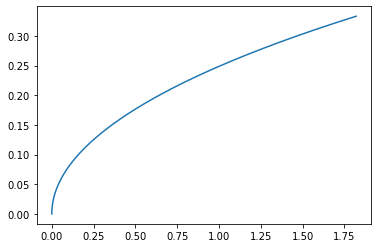

In [87]:
plt.plot( data_sets[ 0 ][ 0 ], data_sets[ 0 ][ 1 ] )

In [88]:
executable_wave_functions[ 1 ]( 0, mass, energy, *harmonic_constants, *probabilities, *lengths )

<lambdifygenerated-2>:2: RuntimeWarning: invalid value encountered in sqrt
  return 2*exp(-2*k_1*x)*abs(((sqrt(-(4*L_1*N_0*k_0*k_1*(exp(2*L_0*k_0) - 1)**2*exp(2*L_1*k_1) - N_0*k_0*(exp(2*L_0*k_0) - 1)**2*exp(4*L_1*k_1) + N_0*k_0*(exp(2*L_0*k_0) - 1)**2 - N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(exp(4*L_1*k_1) - 2*exp(2*L_1*k_1) + 1))/(16*L_0*L_1*k_0*k_1*exp(2*L_0*k_0 + 2*L_1*k_1) + 4*L_0*k_0*exp(2*L_0*k_0) - 4*L_0*k_0*exp(2*L_0*k_0 + 4*L_1*k_1) + 4*L_1*k_1*exp(2*L_1*k_1) - 4*L_1*k_1*exp(4*L_0*k_0 + 2*L_1*k_1) - exp(4*L_0*k_0) - exp(4*L_1*k_1) + exp(4*L_0*k_0 + 4*L_1*k_1) + 1))*exp(L_1*k_1) - sqrt(N_0*k_0/(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1))*abs(exp(2*L_0*k_0) - 1))*exp(2*k_1*x) - (sqrt(-(4*L_1*N_0*k_0*k_1*(exp(2*L_0*k_0) - 1)**2*exp(2*L_1*k_1) - N_0*k_0*(exp(2*L_0*k_0) - 1)**2*exp(4*L_1*k_1) + N_0*k_0*(exp(2*L_0*k_0) - 1)**2 - N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(exp(4*L_1*k_1) - 2*exp(2*L_1*k_1) + 1))/(16*L_0*L_1*k_0*k_1*exp(2*L_0*k_0 + 

nan

In [89]:
import inspect

In [90]:
print( inspect.getsource( executable_wave_functions[ 1 ] ) )

def _lambdifygenerated(x, m, E, k_0, k_1, k_2, N_0, N_1, N_2, L_0, L_1, L_2):
    return 2*exp(-2*k_1*x)*abs(((sqrt(-(4*L_1*N_0*k_0*k_1*(exp(2*L_0*k_0) - 1)**2*exp(2*L_1*k_1) - N_0*k_0*(exp(2*L_0*k_0) - 1)**2*exp(4*L_1*k_1) + N_0*k_0*(exp(2*L_0*k_0) - 1)**2 - N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(exp(4*L_1*k_1) - 2*exp(2*L_1*k_1) + 1))/(16*L_0*L_1*k_0*k_1*exp(2*L_0*k_0 + 2*L_1*k_1) + 4*L_0*k_0*exp(2*L_0*k_0) - 4*L_0*k_0*exp(2*L_0*k_0 + 4*L_1*k_1) + 4*L_1*k_1*exp(2*L_1*k_1) - 4*L_1*k_1*exp(4*L_0*k_0 + 2*L_1*k_1) - exp(4*L_0*k_0) - exp(4*L_1*k_1) + exp(4*L_0*k_0 + 4*L_1*k_1) + 1))*exp(L_1*k_1) - sqrt(N_0*k_0/(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1))*abs(exp(2*L_0*k_0) - 1))*exp(2*k_1*x) - (sqrt(-(4*L_1*N_0*k_0*k_1*(exp(2*L_0*k_0) - 1)**2*exp(2*L_1*k_1) - N_0*k_0*(exp(2*L_0*k_0) - 1)**2*exp(4*L_1*k_1) + N_0*k_0*(exp(2*L_0*k_0) - 1)**2 - N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(exp(4*L_1*k_1) - 2*exp(2*L_1*k_1) + 1))/(16*L_0*L_1*k_0*k_1*exp(2*L_0*k

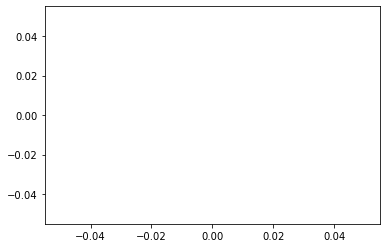

In [91]:
plt.plot( data_sets[ 1 ][ 0 ], data_sets[ 1 ][ 1 ] )

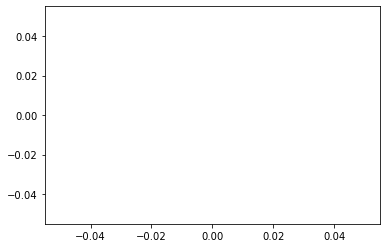

In [92]:
plt.plot( data_sets[ 2 ][ 0 ], data_sets[ 2 ][ 1 ] )

In [93]:
format_constant = lambda constant_name_base, constants : str( constant_name_base ) + '_' + str( len( constants ) )

In [94]:
result1, constants1 = group_constants( stairwell_solver.equations[ 1 ].last_step(), [ stairwell_solver.position ], 'V', format_constant = format_constant )

constants = deepcopy( constants1 )

In [95]:
result

Eq(Integral((-B_{1}*Q_{2}*exp(Q_{1}*x) + B_{1}*Q_{4}*exp(-Q_{1}*x))*(-Q_{2}*exp(Q_{1}*x)*conjugate(B_{1}) + Q_{4}*exp(-Q_{1}*x)*conjugate(B_{1})), (x, 0, L_2)), N_2)

In [96]:
constants

{sqrt(2): V_0,
 1/(exp(2*L_1*k_1) - 1): V_1,
 (sqrt((-4*L_1*N_0*k_0*k_1*(1 - exp(2*L_0*k_0))**2*exp(2*L_1*k_1) + N_0*k_0*(1 - exp(2*L_0*k_0))**2*exp(4*L_1*k_1) - N_0*k_0*(1 - exp(2*L_0*k_0))**2 + N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(exp(4*L_1*k_1) - 2*exp(2*L_1*k_1) + 1))/(16*L_0*L_1*k_0*k_1*exp(2*L_0*k_0 + 2*L_1*k_1) + 4*L_0*k_0*exp(2*L_0*k_0) - 4*L_0*k_0*exp(2*L_0*k_0 + 4*L_1*k_1) + 4*L_1*k_1*exp(2*L_1*k_1) - 4*L_1*k_1*exp(4*L_0*k_0 + 2*L_1*k_1) - exp(4*L_0*k_0) - exp(4*L_1*k_1) + exp(4*L_0*k_0 + 4*L_1*k_1) + 1)) - sqrt(N_0*k_0/(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1))*exp(L_1*k_1)*Abs(exp(2*L_0*k_0) - 1))*exp(L_1*k_1): V_2,
 sqrt((-4*L_1*N_0*k_0*k_1*(1 - exp(2*L_0*k_0))**2*exp(2*L_1*k_1) + N_0*k_0*(1 - exp(2*L_0*k_0))**2*exp(4*L_1*k_1) - N_0*k_0*(1 - exp(2*L_0*k_0))**2 + N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(exp(4*L_1*k_1) - 2*exp(2*L_1*k_1) + 1))/(16*L_0*L_1*k_0*k_1*exp(2*L_0*k_0 + 2*L_1*k_1) + 4*L_0*k_0*exp(2*L_0*k_0) - 4*L_0*k_0*exp(2

In [97]:
result0, constants = group_constants( stairwell_solver.equations[ 0 ].last_step(), [ stairwell_solver.position ], 'V', constants = constants, format_constant = format_constant  )

In [98]:
constants

{sqrt(2): V_0,
 1/(exp(2*L_1*k_1) - 1): V_1,
 (sqrt((-4*L_1*N_0*k_0*k_1*(1 - exp(2*L_0*k_0))**2*exp(2*L_1*k_1) + N_0*k_0*(1 - exp(2*L_0*k_0))**2*exp(4*L_1*k_1) - N_0*k_0*(1 - exp(2*L_0*k_0))**2 + N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(exp(4*L_1*k_1) - 2*exp(2*L_1*k_1) + 1))/(16*L_0*L_1*k_0*k_1*exp(2*L_0*k_0 + 2*L_1*k_1) + 4*L_0*k_0*exp(2*L_0*k_0) - 4*L_0*k_0*exp(2*L_0*k_0 + 4*L_1*k_1) + 4*L_1*k_1*exp(2*L_1*k_1) - 4*L_1*k_1*exp(4*L_0*k_0 + 2*L_1*k_1) - exp(4*L_0*k_0) - exp(4*L_1*k_1) + exp(4*L_0*k_0 + 4*L_1*k_1) + 1)) - sqrt(N_0*k_0/(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1))*exp(L_1*k_1)*Abs(exp(2*L_0*k_0) - 1))*exp(L_1*k_1): V_2,
 sqrt((-4*L_1*N_0*k_0*k_1*(1 - exp(2*L_0*k_0))**2*exp(2*L_1*k_1) + N_0*k_0*(1 - exp(2*L_0*k_0))**2*exp(4*L_1*k_1) - N_0*k_0*(1 - exp(2*L_0*k_0))**2 + N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(exp(4*L_1*k_1) - 2*exp(2*L_1*k_1) + 1))/(16*L_0*L_1*k_0*k_1*exp(2*L_0*k_0 + 2*L_1*k_1) + 4*L_0*k_0*exp(2*L_0*k_0) - 4*L_0*k_0*exp(2

In [99]:
result0

Eq(\psi_{0}(x), -V_15*(V_13 - exp(V_11*(V_10 + 2*x)))*exp(-V_11*x))

In [100]:
result2, constants = group_constants( stairwell_solver.equations[ 2 ].last_step(), [ stairwell_solver.position ], 'V', constants = constants, format_constant = format_constant  )

In [101]:
result2

Eq(\psi_{2}(x), V_23*(V_20*exp(2*V_19*x) + V_22)*exp(-V_19*x))

In [102]:
constants1

{sqrt(2): V_0,
 1/(exp(2*L_1*k_1) - 1): V_1,
 (sqrt((-4*L_1*N_0*k_0*k_1*(1 - exp(2*L_0*k_0))**2*exp(2*L_1*k_1) + N_0*k_0*(1 - exp(2*L_0*k_0))**2*exp(4*L_1*k_1) - N_0*k_0*(1 - exp(2*L_0*k_0))**2 + N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(exp(4*L_1*k_1) - 2*exp(2*L_1*k_1) + 1))/(16*L_0*L_1*k_0*k_1*exp(2*L_0*k_0 + 2*L_1*k_1) + 4*L_0*k_0*exp(2*L_0*k_0) - 4*L_0*k_0*exp(2*L_0*k_0 + 4*L_1*k_1) + 4*L_1*k_1*exp(2*L_1*k_1) - 4*L_1*k_1*exp(4*L_0*k_0 + 2*L_1*k_1) - exp(4*L_0*k_0) - exp(4*L_1*k_1) + exp(4*L_0*k_0 + 4*L_1*k_1) + 1)) - sqrt(N_0*k_0/(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1))*exp(L_1*k_1)*Abs(exp(2*L_0*k_0) - 1))*exp(L_1*k_1): V_2,
 sqrt((-4*L_1*N_0*k_0*k_1*(1 - exp(2*L_0*k_0))**2*exp(2*L_1*k_1) + N_0*k_0*(1 - exp(2*L_0*k_0))**2*exp(4*L_1*k_1) - N_0*k_0*(1 - exp(2*L_0*k_0))**2 + N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(exp(4*L_1*k_1) - 2*exp(2*L_1*k_1) + 1))/(16*L_0*L_1*k_0*k_1*exp(2*L_0*k_0 + 2*L_1*k_1) + 4*L_0*k_0*exp(2*L_0*k_0) - 4*L_0*k_0*exp(2

In [103]:
debug = [ lambdify( stairwell_solver, expression ) for expression in constants1.keys() if not expression in constants1.values() ]

In [104]:
debug

[<function _lambdifygenerated(x, m, E, k_0, k_1, k_2, N_0, N_1, N_2, L_0, L_1, L_2)>,
 <function _lambdifygenerated(x, m, E, k_0, k_1, k_2, N_0, N_1, N_2, L_0, L_1, L_2)>,
 <function _lambdifygenerated(x, m, E, k_0, k_1, k_2, N_0, N_1, N_2, L_0, L_1, L_2)>,
 <function _lambdifygenerated(x, m, E, k_0, k_1, k_2, N_0, N_1, N_2, L_0, L_1, L_2)>,
 <function _lambdifygenerated(x, m, E, k_0, k_1, k_2, N_0, N_1, N_2, L_0, L_1, L_2)>,
 <function _lambdifygenerated(x, m, E, k_0, k_1, k_2, N_0, N_1, N_2, L_0, L_1, L_2)>]

In [105]:
debug[ 2 ]( 0, mass, energy, *harmonic_constants, *probabilities, *lengths )

<lambdifygenerated-6>:2: RuntimeWarning: invalid value encountered in sqrt
  return exp(2*L_1*k_1)*abs((sqrt((-4*L_1*N_0*k_0*k_1*(1 - exp(2*L_0*k_0))**2*exp(2*L_1*k_1) + N_0*k_0*(1 - exp(2*L_0*k_0))**2*exp(4*L_1*k_1) - N_0*k_0*(1 - exp(2*L_0*k_0))**2 + N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(exp(4*L_1*k_1) - 2*exp(2*L_1*k_1) + 1))/(16*L_0*L_1*k_0*k_1*exp(2*L_0*k_0 + 2*L_1*k_1) + 4*L_0*k_0*exp(2*L_0*k_0) - 4*L_0*k_0*exp(2*L_0*k_0 + 4*L_1*k_1) + 4*L_1*k_1*exp(2*L_1*k_1) - 4*L_1*k_1*exp(4*L_0*k_0 + 2*L_1*k_1) - exp(4*L_0*k_0) - exp(4*L_1*k_1) + exp(4*L_0*k_0 + 4*L_1*k_1) + 1)) - sqrt(N_0*k_0/(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1))*exp(L_1*k_1)*abs(exp(2*L_0*k_0) - 1))**2)


nan

In [106]:
print( inspect.getsource( debug[ 2 ] ) )

def _lambdifygenerated(x, m, E, k_0, k_1, k_2, N_0, N_1, N_2, L_0, L_1, L_2):
    return exp(2*L_1*k_1)*abs((sqrt((-4*L_1*N_0*k_0*k_1*(1 - exp(2*L_0*k_0))**2*exp(2*L_1*k_1) + N_0*k_0*(1 - exp(2*L_0*k_0))**2*exp(4*L_1*k_1) - N_0*k_0*(1 - exp(2*L_0*k_0))**2 + N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(exp(4*L_1*k_1) - 2*exp(2*L_1*k_1) + 1))/(16*L_0*L_1*k_0*k_1*exp(2*L_0*k_0 + 2*L_1*k_1) + 4*L_0*k_0*exp(2*L_0*k_0) - 4*L_0*k_0*exp(2*L_0*k_0 + 4*L_1*k_1) + 4*L_1*k_1*exp(2*L_1*k_1) - 4*L_1*k_1*exp(4*L_0*k_0 + 2*L_1*k_1) - exp(4*L_0*k_0) - exp(4*L_1*k_1) + exp(4*L_0*k_0 + 4*L_1*k_1) + 1)) - sqrt(N_0*k_0/(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1))*exp(L_1*k_1)*abs(exp(2*L_0*k_0) - 1))**2)



In [107]:
def troublnator(x, m, E, k_0, k_1, k_2, N_0, N_1, N_2, L_0, L_1, L_2): 
        return (
                16*L_0*L_1*k_0*k_1* np.exp (2*L_0*k_0 + 2*L_1*k_1) + 4*L_0*k_0* np.exp (2*L_0*k_0) - 4*L_0*k_0 \
                * np.exp (2*L_0*k_0 + 4*L_1*k_1) + 4*L_1*k_1* np.exp (2*L_1*k_1) - 4*L_1*k_1* np.exp (4*L_0*k_0 + 2*L_1*k_1) \
                -  np.exp (4*L_0*k_0) -  np.exp (4*L_1*k_1) +  np.exp (4*L_0*k_0 + 4*L_1*k_1) + 1
            )

def good_interior(x, m, E, k_0, k_1, k_2, N_0, N_1, N_2, L_0, L_1, L_2): 
        return -4*L_1*N_0*k_0*k_1*(1 -  np.exp (2*L_0*k_0))**2* np.exp (2*L_1*k_1) + N_0 \
                *k_0*(1 -  np.exp (2*L_0*k_0))**2* np.exp (4*L_1*k_1) - N_0*k_0*(1 -  np.exp (2*L_0*k_0))**2 \
                + N_1*k_1*(4*L_0*k_0* np.exp (2*L_0*k_0) -  np.exp (4*L_0*k_0) + 1)*( np.exp (4*L_1*k_1) - 2* np.exp (2*L_1*k_1) + 1)

def troubleroot(x, m, E, k_0, k_1, k_2, N_0, N_1, N_2, L_0, L_1, L_2): 
        return np.sqrt ( (
                            good_interior(x, m, E, k_0, k_1, k_2, N_0, N_1, N_2, L_0, L_1, L_2) 
                    ) / troublnator(x, m, E, k_0, k_1, k_2, N_0, N_1, N_2, L_0, L_1, L_2)
                )

def interior(x, m, E, k_0, k_1, k_2, N_0, N_1, N_2, L_0, L_1, L_2): 
    return N_0*k_0/(4*L_0*k_0* np.exp (2*L_0*k_0) -  np.exp (4*L_0*k_0) + 1)

def other_troubleroot(x, m, E, k_0, k_1, k_2, N_0, N_1, N_2, L_0, L_1, L_2): 
    return np.sqrt (interior(x, m, E, k_0, k_1, k_2, N_0, N_1, N_2, L_0, L_1, L_2))* np.exp (L_1*k_1)* np.abs ( np.exp (2*L_0*k_0) - 1)

def _lambdifygenerated(x, m, E, k_0, k_1, k_2, N_0, N_1, N_2, L_0, L_1, L_2):
    return  np.exp (2*L_1*k_1)* np.abs ( (
                troubleroot(x, m, E, k_0, k_1, k_2, N_0, N_1, N_2, L_0, L_1, L_2) \
                - other_troubleroot(x, m, E, k_0, k_1, k_2, N_0, N_1, N_2, L_0, L_1, L_2)
            ) ** 2 )


In [108]:
interior( 0, mass, energy, *harmonic_constants, *probabilities, *lengths )

-1.1913292013686645

In [109]:
good_interior( 0, mass, energy, *harmonic_constants, *probabilities, *lengths )

0.005710877031672477

In [110]:
psi_not_foil = ( stairwell_solver.equations[ 1 ].last_step().rhs ** 2 ).simplify()

In [111]:
#a = lambdify( stairwell_solver, psi_not_foil )

In [122]:
psi_not_foil

2*((sqrt((-4*L_1*N_0*k_0*k_1*(1 - exp(2*L_0*k_0))**2*exp(2*L_1*k_1) + N_0*k_0*(1 - exp(2*L_0*k_0))**2*exp(4*L_1*k_1) - N_0*k_0*(1 - exp(2*L_0*k_0))**2 + N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(exp(4*L_1*k_1) - 2*exp(2*L_1*k_1) + 1))/(16*L_0*L_1*k_0*k_1*exp(2*L_0*k_0 + 2*L_1*k_1) + 4*L_0*k_0*exp(2*L_0*k_0) - 4*L_0*k_0*exp(2*L_0*k_0 + 4*L_1*k_1) + 4*L_1*k_1*exp(2*L_1*k_1) - 4*L_1*k_1*exp(4*L_0*k_0 + 2*L_1*k_1) - exp(4*L_0*k_0) - exp(4*L_1*k_1) + exp(4*L_0*k_0 + 4*L_1*k_1) + 1))*exp(L_1*k_1) - sqrt(N_0*k_0/(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1))*Abs(exp(2*L_0*k_0) - 1))*exp(2*k_1*x) - (sqrt((-4*L_1*N_0*k_0*k_1*(1 - exp(2*L_0*k_0))**2*exp(2*L_1*k_1) + N_0*k_0*(1 - exp(2*L_0*k_0))**2*exp(4*L_1*k_1) - N_0*k_0*(1 - exp(2*L_0*k_0))**2 + N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(exp(4*L_1*k_1) - 2*exp(2*L_1*k_1) + 1))/(16*L_0*L_1*k_0*k_1*exp(2*L_0*k_0 + 2*L_1*k_1) + 4*L_0*k_0*exp(2*L_0*k_0) - 4*L_0*k_0*exp(2*L_0*k_0 + 4*L_1*k_1) + 4*L_1*k_1*exp(2*L_1*k_1

In [112]:
psi_1 = ( stairwell_solver.equations[ 1 ].last_step().rhs ** 2 ).simplify().expand()

In [113]:
big_result, big_constants = group_constants( psi_1, [ stairwell_solver.position ], 'G', format_constant = format_constant )

In [114]:
big_result

-4*G_27*exp(4*G_0*x)/(-2*G_10*exp(2*G_0*x) + 2*G_11*exp(2*G_0*x) - 8*G_13*exp(2*G_0*x) + 4*G_15*exp(2*G_0*x) + 4*G_16*exp(2*G_0*x) + 4*G_17*exp(2*G_0*x) - 8*G_18*exp(2*G_0*x) - 4*G_19*exp(2*G_0*x) - G_2*exp(2*G_0*x) - 4*G_20*exp(2*G_0*x) - 4*G_21*exp(2*G_0*x) + 8*G_22*exp(2*G_0*x) + 8*G_23*exp(2*G_0*x) - 32*G_24*exp(2*G_0*x) + 16*G_25*exp(2*G_0*x) + 16*G_26*exp(2*G_0*x) - G_4*exp(2*G_0*x) - 2*G_6*exp(2*G_0*x) + 2*G_8*exp(2*G_0*x) + G_9*exp(2*G_0*x) + exp(2*G_0*x)) + 8*G_27*exp(2*G_0*x)/(-2*G_10*exp(2*G_0*x) + 2*G_11*exp(2*G_0*x) - 8*G_13*exp(2*G_0*x) + 4*G_15*exp(2*G_0*x) + 4*G_16*exp(2*G_0*x) + 4*G_17*exp(2*G_0*x) - 8*G_18*exp(2*G_0*x) - 4*G_19*exp(2*G_0*x) - G_2*exp(2*G_0*x) - 4*G_20*exp(2*G_0*x) - 4*G_21*exp(2*G_0*x) + 8*G_22*exp(2*G_0*x) + 8*G_23*exp(2*G_0*x) - 32*G_24*exp(2*G_0*x) + 16*G_25*exp(2*G_0*x) + 16*G_26*exp(2*G_0*x) - G_4*exp(2*G_0*x) - 2*G_6*exp(2*G_0*x) + 2*G_8*exp(2*G_0*x) + G_9*exp(2*G_0*x) + exp(2*G_0*x)) - 4*G_27/(-2*G_10*exp(2*G_0*x) + 2*G_11*exp(2*G_0*x) - 8*G_13

In [115]:
#simplify = big_result.simplify()

In [116]:
#simplify

In [117]:
big_constants

{k_1: G_0,
 exp(4*L_0*k_0): G_1,
 G_1: G_2,
 exp(8*L_1*k_1): G_3,
 G_3: G_4,
 exp(2*L_1*k_1): G_5,
 G_5: G_6,
 exp(6*L_1*k_1): G_7,
 G_7: G_8,
 G_1*G_3: G_9,
 G_1*G_7: G_10,
 G_1*G_5: G_11,
 exp(4*L_1*k_1): G_12,
 G_12*L_1*k_1: G_13,
 exp(2*L_0*k_0): G_14,
 G_14*L_0*k_0: G_15,
 G_5*L_1*k_1: G_16,
 G_7*L_1*k_1: G_17,
 G_14*G_5*L_0*k_0: G_18,
 G_14*G_3*L_0*k_0: G_19,
 G_1*G_5*L_1*k_1: G_20,
 G_1*G_7*L_1*k_1: G_21,
 G_14*G_7*L_0*k_0: G_22,
 G_1*G_12*L_1*k_1: G_23,
 G_12*G_14*L_0*L_1*k_0*k_1: G_24,
 G_14*G_5*L_0*L_1*k_0*k_1: G_25,
 G_14*G_7*L_0*L_1*k_0*k_1: G_26,
 G_12*N_1*k_1: G_27,
 G_5*N_0*k_0: G_28,
 G_12: G_29,
 G_1*G_12: G_30,
 G_12*G_14*L_0*k_0: G_31,
 G_12*N_0*k_0: G_32,
 N_0*k_0: G_33,
 G_7*N_0*k_0: G_34,
 G_5*N_1*k_1: G_35,
 G_7*N_1*k_1: G_36,
 G_12*G_14*N_0*k_0: G_37,
 G_14*N_0*k_0: G_38,
 G_14*G_7*N_0*k_0: G_39,
 sqrt(N_0*k_0/(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)): G_40,
 sqrt(4*L_0*N_1*k_0*k_1*exp(2*L_0*k_0)*exp(4*L_1*k_1)/(16*L_0*L_1*k_0*k_1*exp(2*L_0*k_0)*exp(2*L_1

In [118]:
big_debug = [ lambdify( stairwell_solver, expression ) for expression in constants1.keys() ]

In [119]:
inspect.getsource( big_debug[ 6 ] )#( 0, mass, energy, *harmonic_constants, *probabilities, *lengths )

'def _lambdifygenerated(x, m, E, k_0, k_1, k_2, N_0, N_1, N_2, L_0, L_1, L_2):\n    return V_2**2\n'

In [120]:
tests = [ function( 0, mass, energy, *harmonic_constants, *probabilities, *lengths ) for function in big_debug ]

<lambdifygenerated-12>:2: RuntimeWarning: invalid value encountered in sqrt
  return exp(2*L_1*k_1)*abs((sqrt((-4*L_1*N_0*k_0*k_1*(1 - exp(2*L_0*k_0))**2*exp(2*L_1*k_1) + N_0*k_0*(1 - exp(2*L_0*k_0))**2*exp(4*L_1*k_1) - N_0*k_0*(1 - exp(2*L_0*k_0))**2 + N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(exp(4*L_1*k_1) - 2*exp(2*L_1*k_1) + 1))/(16*L_0*L_1*k_0*k_1*exp(2*L_0*k_0 + 2*L_1*k_1) + 4*L_0*k_0*exp(2*L_0*k_0) - 4*L_0*k_0*exp(2*L_0*k_0 + 4*L_1*k_1) + 4*L_1*k_1*exp(2*L_1*k_1) - 4*L_1*k_1*exp(4*L_0*k_0 + 2*L_1*k_1) - exp(4*L_0*k_0) - exp(4*L_1*k_1) + exp(4*L_0*k_0 + 4*L_1*k_1) + 1)) - sqrt(N_0*k_0/(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1))*exp(L_1*k_1)*abs(exp(2*L_0*k_0) - 1))**2)
<lambdifygenerated-13>:2: RuntimeWarning: invalid value encountered in sqrt
  return abs((sqrt((-4*L_1*N_0*k_0*k_1*(1 - exp(2*L_0*k_0))**2*exp(2*L_1*k_1) + N_0*k_0*(1 - exp(2*L_0*k_0))**2*exp(4*L_1*k_1) - N_0*k_0*(1 - exp(2*L_0*k_0))**2 + N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*

In [121]:
for constant in big_constants.keys(): 
    display( constant )

k_1

exp(4*L_0*k_0)

G_1

exp(8*L_1*k_1)

G_3

exp(2*L_1*k_1)

G_5

exp(6*L_1*k_1)

G_7

G_1*G_3

G_1*G_7

G_1*G_5

exp(4*L_1*k_1)

G_12*L_1*k_1

exp(2*L_0*k_0)

G_14*L_0*k_0

G_5*L_1*k_1

G_7*L_1*k_1

G_14*G_5*L_0*k_0

G_14*G_3*L_0*k_0

G_1*G_5*L_1*k_1

G_1*G_7*L_1*k_1

G_14*G_7*L_0*k_0

G_1*G_12*L_1*k_1

G_12*G_14*L_0*L_1*k_0*k_1

G_14*G_5*L_0*L_1*k_0*k_1

G_14*G_7*L_0*L_1*k_0*k_1

G_12*N_1*k_1

G_5*N_0*k_0

G_12

G_1*G_12

G_12*G_14*L_0*k_0

G_12*N_0*k_0

N_0*k_0

G_7*N_0*k_0

G_5*N_1*k_1

G_7*N_1*k_1

G_12*G_14*N_0*k_0

G_14*N_0*k_0

G_14*G_7*N_0*k_0

sqrt(N_0*k_0/(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1))

sqrt(4*L_0*N_1*k_0*k_1*exp(2*L_0*k_0)*exp(4*L_1*k_1)/(16*L_0*L_1*k_0*k_1*exp(2*L_0*k_0)*exp(2*L_1*k_1) - 4*L_0*k_0*exp(2*L_0*k_0)*exp(4*L_1*k_1) + 4*L_0*k_0*exp(2*L_0*k_0) - 4*L_1*k_1*exp(4*L_0*k_0)*exp(2*L_1*k_1) + 4*L_1*k_1*exp(2*L_1*k_1) + exp(4*L_0*k_0)*exp(4*L_1*k_1) - exp(4*L_0*k_0) - exp(4*L_1*k_1) + 1) - 8*L_0*N_1*k_0*k_1*exp(2*L_0*k_0)*exp(2*L_1*k_1)/(16*L_0*L_1*k_0*k_1*exp(2*L_0*k_0)*exp(2*L_1*k_1) - 4*L_0*k_0*exp(2*L_0*k_0)*exp(4*L_1*k_1) + 4*L_0*k_0*exp(2*L_0*k_0) - 4*L_1*k_1*exp(4*L_0*k_0)*exp(2*L_1*k_1) + 4*L_1*k_1*exp(2*L_1*k_1) + exp(4*L_0*k_0)*exp(4*L_1*k_1) - exp(4*L_0*k_0) - exp(4*L_1*k_1) + 1) + 4*L_0*N_1*k_0*k_1*exp(2*L_0*k_0)/(16*L_0*L_1*k_0*k_1*exp(2*L_0*k_0)*exp(2*L_1*k_1) - 4*L_0*k_0*exp(2*L_0*k_0)*exp(4*L_1*k_1) + 4*L_0*k_0*exp(2*L_0*k_0) - 4*L_1*k_1*exp(4*L_0*k_0)*exp(2*L_1*k_1) + 4*L_1*k_1*exp(2*L_1*k_1) + exp(4*L_0*k_0)*exp(4*L_1*k_1) - exp(4*L_0*k_0) - exp(4*L_1*k_1) + 1) - 4*L_1*N_0*k_0*k_1*exp(4*L_0*k_0)*exp(2*L_1*k_1)/(16*L_0*L_1*k_0*k_1*exp(2*L_0*k_0)*

Abs(exp(2*L_0*k_0) - 1)

exp(3*L_1*k_1)

G_40*G_41*G_42*G_43

G_1*G_5*N_0*k_0

G_1*G_5*N_1*k_1

G_1*G_7*N_1*k_1

G_1*G_12*N_0*k_0

G_1*N_0*k_0

G_1*G_7*N_0*k_0

G_14*G_5*N_0*k_0

G_1*G_12*N_1*k_1

G_12*L_1*N_0*k_0*k_1

exp(L_1*k_1)

G_40*G_41*G_42*G_54

G_12*G_14*L_0*N_1*k_0*k_1

G_1*G_12*L_1*N_0*k_0*k_1

G_14*G_5*L_0*N_1*k_0*k_1

G_14*G_7*L_0*N_1*k_0*k_1

G_12*G_14*L_1*N_0*k_0*k_1